In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import output

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

output.clear()

# 데이터 인풋

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Data/구내식당_식수인원예측/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Data/구내식당_식수인원예측/test.csv")

train.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0


In [ ]:
test.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치


- 조식메뉴 컬럼 제거

In [ ]:
del train['조식메뉴']
del test['조식메뉴']
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [ ]:
train.shape, test.shape

((1205, 11), (50, 9))

In [ ]:
# 일자를 datetime 형식으로 변환
train.일자 = pd.to_datetime(train.일자)
test.일자 = pd.to_datetime(test.일자)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일자              1205 non-null   datetime64[ns]
 1   요일              1205 non-null   object        
 2   본사정원수           1205 non-null   int64         
 3   본사휴가자수          1205 non-null   int64         
 4   본사출장자수          1205 non-null   int64         
 5   본사시간외근무명령서승인건수  1205 non-null   int64         
 6   현본사소속재택근무자수     1205 non-null   float64       
 7   중식메뉴            1205 non-null   object        
 8   석식메뉴            1205 non-null   object        
 9   중식계             1205 non-null   float64       
 10  석식계             1205 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 103.7+ KB


- 실근무인원 측정

In [ ]:
train['실근무인원'] = train.본사정원수 - train.본사출장자수 - train.본사휴가자수 - train.현본사소속재택근무자수
test['실근무인원'] = test.본사정원수 - test.본사출장자수 - test.본사휴가자수 - test.현본사소속재택근무자수
train.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계,실근무인원
0,2016-02-01,월,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2401.0
1,2016-02-02,화,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2378.0
2,2016-02-03,수,2601,56,180,111,0.0,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2365.0


- 요일을 숫자로 변환

In [ ]:
train.요일 = train.요일.map({'월':1,'화':2, '수':3, '목':4, '금':5})
test.요일 = test.요일.map({'월':1,'화':2, '수':3, '목':4, '금':5})
train.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계,실근무인원
0,2016-02-01,1,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2401.0
1,2016-02-02,2,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2378.0
2,2016-02-03,3,2601,56,180,111,0.0,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2365.0


- 년, 월, 일 분리해서 컬럼 생성 

In [ ]:
train['년도'] = train.일자.dt.year
train['월'] = train.일자.dt.month
train['일'] = train.일자.dt.day

train.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계,실근무인원,년도,월,일
0,2016-02-01,1,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2401.0,2016,2,1
1,2016-02-02,2,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2378.0,2016,2,2
2,2016-02-03,3,2601,56,180,111,0.0,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2365.0,2016,2,3


In [ ]:
test['년도'] = test.일자.dt.year
test['월'] = test.일자.dt.month
test['일'] = test.일자.dt.day

test.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,실근무인원,년도,월,일
0,2021-01-27,3,2983,88,182,5,358.0,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치,2355.0,2021,1,27
1,2021-01-28,4,2983,104,212,409,348.0,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지,2319.0,2021,1,28
2,2021-01-29,5,2983,270,249,0,294.0,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치,2170.0,2021,1,29


- 비선호 메뉴 찾기

In [ ]:
# penalty컬럼 생성 - 해산물류, 반조리제품이 많을수록 숫자가 증가
train['lunch_penalty'] = 0
train['dinner_penalty'] = 0

test['lunch_penalty'] = 0
test['dinner_penalty'] = 0

train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계,실근무인원,년도,월,일,lunch_penalty,dinner_penalty
0,2016-02-01,1,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2401.0,2016,2,1,0,0
1,2016-02-02,2,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2378.0,2016,2,2,0,0
2,2016-02-03,3,2601,56,180,111,0.0,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2365.0,2016,2,3,0,0
3,2016-02-04,4,2601,104,220,355,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2277.0,2016,2,4,0,0
4,2016-02-05,5,2601,278,181,34,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2142.0,2016,2,5,0,0


In [ ]:
# hatelist작성한 것 가져오기 
file = open('/content/drive/MyDrive/Data/구내식당_식수인원예측/hatelist.txt','r',encoding='utf-8')
hate_menu = file.readlines()
hate_menu = [x.strip() for x in hate_menu]
hate_menu[:5]

['오징어', '가자미', '고등어', '갈치', '꽁치']

In [ ]:
mlist = []
for menu in hate_menu:
  if menu in train.중식메뉴[1]:
    mlist.append(menu)
    print(mlist)
    print(len(mlist))

['가자미']
1
['가자미', '무침']
2


In [ ]:
for i in range(0,len(train)):
  lunch = 0
  dinner = 0
  for menu in hate_menu:
    if menu in train.중식메뉴[i]:
      lunch += 1
    if menu in train.석식메뉴[i]:
      dinner += 1
  train.lunch_penalty[i] = lunch 
  train.dinner_penalty[i] = dinner 

train.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계,실근무인원,년도,월,일,lunch_penalty,dinner_penalty
0,2016-02-01,1,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2401.0,2016,2,1,2,3
1,2016-02-02,2,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2378.0,2016,2,2,2,1
2,2016-02-03,3,2601,56,180,111,0.0,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2365.0,2016,2,3,3,1


In [ ]:
test['lunch_penalty'] = 0
test['dinner_penalty'] = 0

In [ ]:
for i in range(0,len(test)):
  lunch = 0
  dinner = 0
  for menu in hate_menu:
    if menu in test.중식메뉴[i]:
      lunch += 1
    if menu in test.석식메뉴[i]:
      dinner += 1
  test.lunch_penalty[i] = lunch
  test.dinner_penalty[i] = dinner

train.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계,실근무인원,년도,월,일,lunch_penalty,dinner_penalty
0,2016-02-01,1,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2401.0,2016,2,1,2,3
1,2016-02-02,2,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2378.0,2016,2,2,2,1
2,2016-02-03,3,2601,56,180,111,0.0,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2365.0,2016,2,3,3,1


- null 값 확인 

In [ ]:
train.isnull().sum()

일자                0
요일                0
본사정원수             0
본사휴가자수            0
본사출장자수            0
본사시간외근무명령서승인건수    0
현본사소속재택근무자수       0
중식메뉴              0
석식메뉴              0
중식계               0
석식계               0
실근무인원             0
년도                0
월                 0
일                 0
lunch_penalty     0
dinner_penalty    0
dtype: int64

In [ ]:
test.isnull().sum()

일자                0
요일                0
본사정원수             0
본사휴가자수            0
본사출장자수            0
본사시간외근무명령서승인건수    0
현본사소속재택근무자수       0
중식메뉴              0
석식메뉴              0
실근무인원             0
년도                0
월                 0
일                 0
dtype: int64

# EDA

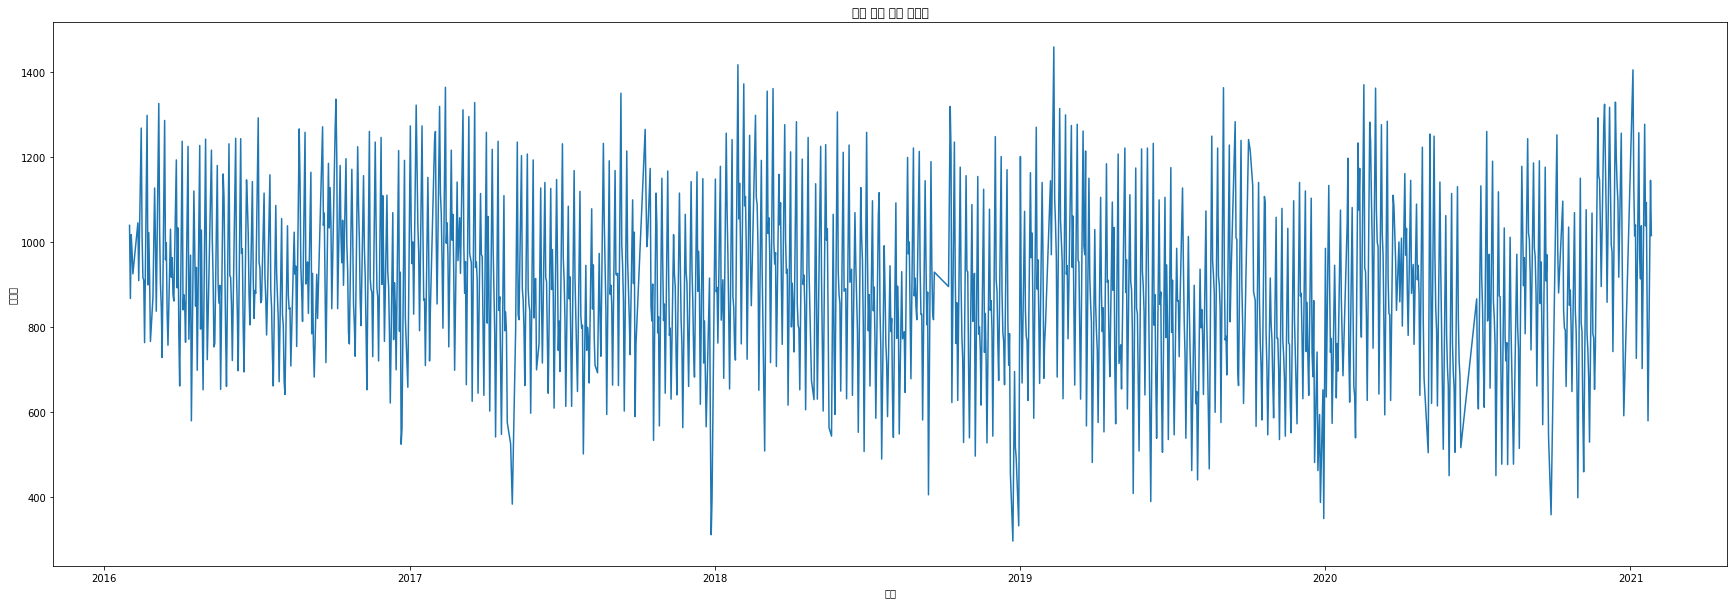

In [ ]:
plt.figure(figsize=(30,10))
sns.lineplot(x='일자', y="중식계", data=train)
plt.title("중식 먹는 사람 시계열")
plt.show()

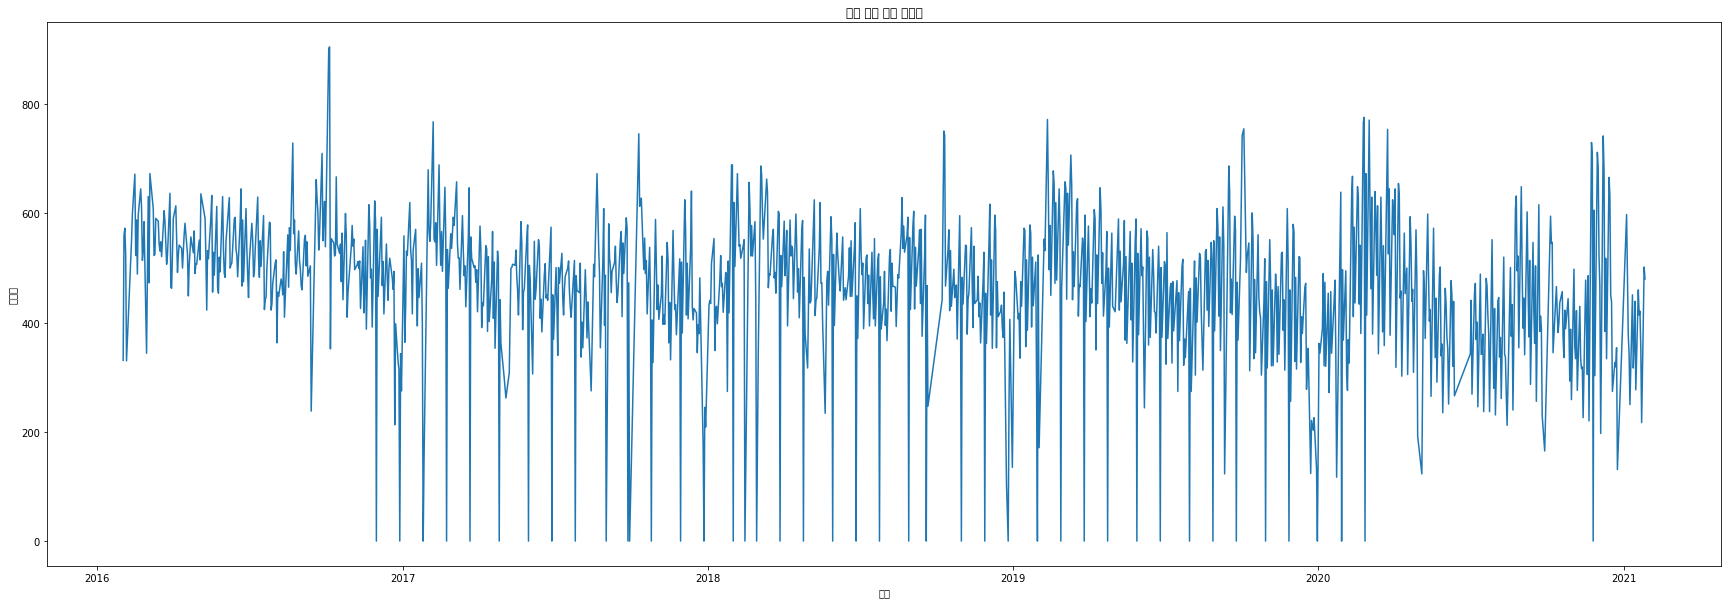

In [ ]:
plt.figure(figsize=(30,10))
sns.lineplot(x='일자', y="석식계", data=train)
plt.title("석식 먹는 사람 시계열")
plt.show()

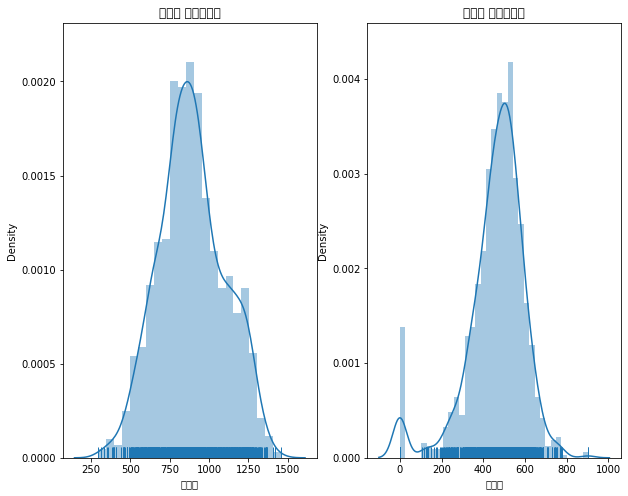

In [ ]:
plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
sns.distplot(train.중식계 , kde=True, rug=True)
plt.title("중식계 히스토그램")

plt.subplot(1,2,2)
sns.distplot(train.석식계, kde=True, rug=True)
plt.title("석식계 히스토그램")

plt.show()

석식의 경우 0인 날이 있어보임 -> 처리가 필요

In [ ]:
train[train.석식계 == 0].head(8)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계,실근무인원,년도,월,일
204,2016-11-30,3,2689,68,207,0,0.0,나물비빔밥 (쌀:국내산) 가쯔오장국 치킨핑거*요거트D 감자샐러드 오복지무침 ...,*,1109.0,0.0,2414.0,2016,11,30
224,2016-12-28,3,2705,166,225,0,0.0,콩나물밥 (쌀:국내산) 가쯔오장국 미트볼케찹조림 꽃맛살샐러드 군고구마 배추겉...,*,767.0,0.0,2314.0,2016,12,28
244,2017-01-25,3,2697,79,203,0,0.0,카레덮밥 (쌀:국내산) 맑은국 유린기 개성감자만두 오이사과무침 포기김치 (김...,*,720.0,0.0,2415.0,2017,1,25
262,2017-02-22,3,2632,75,252,0,0.0,나물비빔밥 (쌀:국내산) 유부장국 생선까스*탈탈소스 파스타샐러드 마늘쫑볶음 ...,*,1065.0,0.0,2305.0,2017,2,22
281,2017-03-22,3,2627,53,235,0,0.0,쌀밥/잡곡밥 (쌀:국내산) 돈육김치찌개 유린기 비엔나볶음 세발나물 깍두기 (...,*,953.0,0.0,2339.0,2017,3,22
306,2017-04-26,3,2626,45,304,0,0.0,비빔밥 (쌀:국내산) 맑은국 오징어튀김 견과류조림 하와이안샐러드 깍두기 (김...,*,835.0,0.0,2277.0,2017,4,26
327,2017-05-31,3,2637,43,265,0,0.0,열무보리비빔밥 (쌀:국내산) 가쯔오장국 탕수만두 콥샐러드 오이지무침 포기김치...,자기계발의날,910.0,0.0,2329.0,2017,5,31
346,2017-06-28,3,2648,58,259,0,0.0,콩나물밥 (쌀:국내산) 얼갈이된장국 삼치구이 잡채 아삭고추무침 깍두기 (김치...,*자기계발의날*,745.0,0.0,2331.0,2017,6,28


야근 인원이 없어서 없는것일까?

In [ ]:
din_0 = train[train.석식계 == 0]

din_0.pivot_table("본사시간외근무명령서승인건수","석식메뉴",aggfunc=np.sum)

,본사시간외근무명령서승인건수
석식메뉴,
,1
*,0
*자기계발의날*,0
가정의날,0
자기계발의날,0
*,0
*,93
* 자기개발의날 *,0
* 자기계발의날 *,0


석식 메뉴가 없거나, 메뉴가 있어도 야근 인원이 없는 날은 석식 식수 인원이 0이다. 

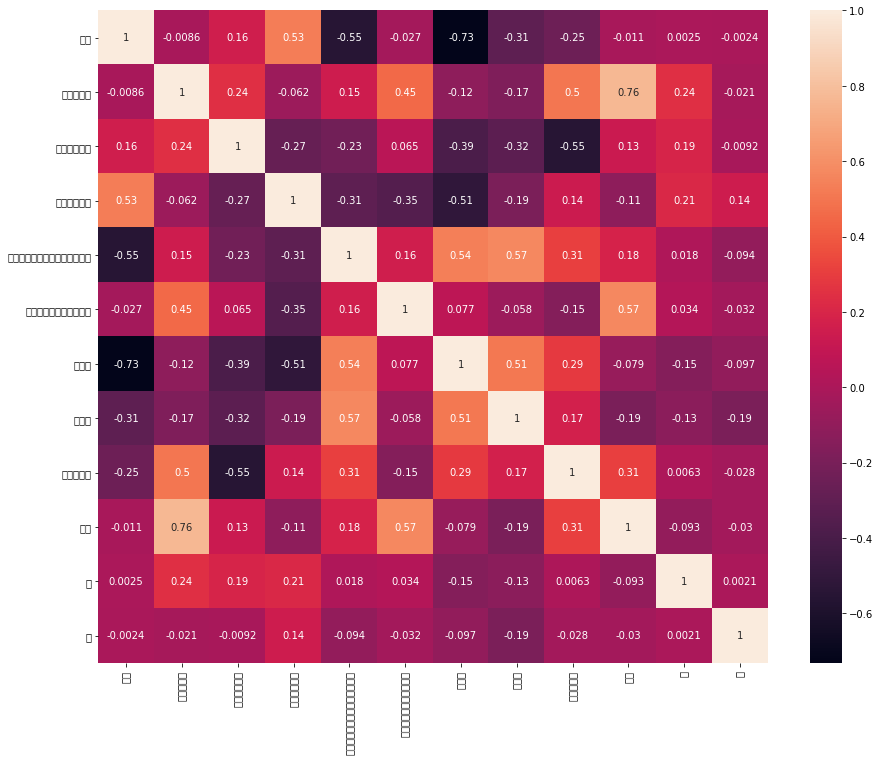

In [ ]:
plt.figure(figsize = (15,12))
sns.heatmap(train.corr(),annot = True)

In [ ]:
train.corr()['중식계']

요일               -0.731563
본사정원수            -0.115529
본사휴가자수           -0.391975
본사출장자수           -0.512680
본사시간외근무명령서승인건수    0.535611
현본사소속재택근무자수       0.076509
중식계               1.000000
석식계               0.508287
실근무인원             0.286810
년도               -0.078804
월                -0.154664
일                -0.097392
Name: 중식계, dtype: float64

중식계와 다른 변수들의 상관관계를 파악해본 결과, 유의미한 (0.3 이상) 상관관계가 있는 변수는  
요일, 본사휴가자수, 본사 출장자수, 본사시간외근무명령서승인건수 로 보인다. 

In [ ]:
train.corr()['석식계']

요일               -0.312112
본사정원수            -0.173852
본사휴가자수           -0.316894
본사출장자수           -0.188164
본사시간외근무명령서승인건수    0.571168
현본사소속재택근무자수      -0.057534
중식계               0.508287
석식계               1.000000
실근무인원             0.172373
년도               -0.194792
월                -0.127142
일                -0.185565
Name: 석식계, dtype: float64

석식계와 다른 변수들의 상관관계를 파악해본 결과, 유의미한 (0.3 이상) 상관관계가 있는 변수는  
요일, 본사휴가자수, 본사시간외근무명령서승인건수로 보인다.  




---

중식계의 경우는 석식계보다 출장자수의 영향을 더 많이 받는다.  


In [ ]:
train['중식계비율'] = train['중식계'] / train['실근무인원']

In [ ]:
train.sort_values(by='중식계비율',ascending=False).head(10)[['중식메뉴','중식계','실근무인원','중식계비율','요일']]

,중식메뉴,중식계,실근무인원,중식계비율,요일
1170,쌀밥/찰보리밥/찰현미밥 김치두부국 LA갈비구이 한식잡채 삼색유자청무침 포기김치/오프...,1324.0,2217.0,0.597203,2
490,쌀밥/잡곡밥 (쌀:국내산) 봄동된장국 가래떡돼지갈비찜 콩나물겨자채 참나물무침 ...,1417.0,2393.0,0.592144,1
1174,쌀밥/흑미밥/찰현미밥 유부주머니국 삼겹살김치볶음 두부구이 어묵간장조림 포기김치/귤 ...,1317.0,2255.0,0.584035,1
1179,쌀밥/흑미밥/찰현미밥 (New)누룽지장각백숙 (New)캔꽁치튀김 쫄면채소무침 풋고추...,1329.0,2291.0,0.580096,1
398,쌀밥/잡곡밥 (쌀:국내산) 시래기된장국 유자청제육볶음 오꼬노미야끼계란말이 치커...,1350.0,2338.0,0.577417,1
255,쌀밥/잡곡밥 (쌀:국내산) 쇠고기미역국 제육볶음 두부구이*양념장 도라지오이생채...,1364.0,2375.0,0.574316,1
1188,쌀밥/흑미밥/찰현미밥 소고기떡국 봉추찜닭 오미산적/동태전 콩나물잡채 포기김치/식혜 ...,1405.0,2460.0,0.571138,1
1109,쌀밥/흑미밥/찰현미밥 황태콩나물해장국 (New)궁보계정 시금치프리타타 가지고추장무침...,1243.0,2179.0,0.570445,1
503,쌀밥/잡곡밥 (쌀:국내산) 들깨미역국 훈제오리구이 두부양념조림 쌈무/부추생채 ...,1298.0,2281.0,0.569049,1
279,쌀밥/잡곡밥 (쌀:국내산) 아욱국 콩나물불고기 맛살전 상추무침 포기김치 (김...,1328.0,2334.0,0.568980,1


메뉴보다는 요일적 요인이 더 강해보인다.   

- 요일별 식수인원 피벗테이블  
- 반조리식품, 해산물류 1,0

In [ ]:
lunch_menu = train['중식메뉴']
a = lunch_menu[100].split(") ")
b = a[0].split(" (")
b.pop()
b

['쌀밥/잡곡밥']

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Case2 - Simple DNN with all  

딥러닝은 변수가 많을수록 효과가 좋다는 것을 깜빡...

### 중식계

In [ ]:
features = ['요일','본사정원수','본사휴가자수','본사출장자수','본사시간외근무명령서승인건수','현본사소속재택근무자수','실근무인원','년도','월','일']
X_lunch = train[features]
X_lunch.shape

(1205, 10)

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaledlunch = scaler.fit_transform(X_lunch)
X_scaledlunch_test = scaler.transform(test[features])
X_scaledlunch[:5]

array([[-1.        , -0.50157729, -0.48245614, -1.72727273, -0.13616071,
         0.        ,  0.24444444, -1.        , -1.        , -1.07142857],
       [-0.5       , -0.50157729, -0.48245614, -1.30909091,  0.04464286,
         0.        ,  0.11666667, -1.        , -1.        , -1.        ],
       [ 0.        , -0.50157729, -0.42982456, -1.18181818, -0.41964286,
         0.        ,  0.04444444, -1.        , -1.        , -0.92857143],
       [ 0.5       , -0.50157729, -0.00877193, -0.45454545,  0.125     ,
         0.        , -0.44444444, -1.        , -1.        , -0.85714286],
       [ 1.        , -0.50157729,  1.51754386, -1.16363636, -0.59151786,
         0.        , -1.19444444, -1.        , -1.        , -0.78571429]])

In [ ]:
X_scaledlunch.shape

(1205, 10)

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Conv1D, Dropout, MaxPooling1D

In [ ]:
model_lunch2 = Sequential([
                    Dense(64, input_dim=10, activation='relu'),
                    Dropout(0.25),
                    Dense(32,activation='relu'),
                    Dense(16,activation='relu'),
                    Dropout(0.25),
                    Dense(8,activation='relu'),
                    Dense(1)
])

model_lunch2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 64)                704       
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_22 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                

In [ ]:
model_lunch2.compile(
    optimizer = 'adam',
    loss='mean_squared_error',
    metrics=['mae','accuracy']
)

In [ ]:
model_lunch2.fit(X_scaledlunch, train['중식계'], epochs = 1000, batch_size=50, verbose = 2)

Epoch 1/1000
25/25 - 1s - loss: 832620.3750 - mae: 888.1465 - accuracy: 0.0000e+00
Epoch 2/1000
25/25 - 0s - loss: 818365.1250 - mae: 880.0944 - accuracy: 0.0000e+00
Epoch 3/1000
25/25 - 0s - loss: 770775.7500 - mae: 846.7743 - accuracy: 0.0000e+00
Epoch 4/1000
25/25 - 0s - loss: 715584.5000 - mae: 795.0539 - accuracy: 0.0000e+00
Epoch 5/1000
25/25 - 0s - loss: 698725.1875 - mae: 782.8563 - accuracy: 0.0000e+00
Epoch 6/1000
25/25 - 0s - loss: 671829.3125 - mae: 766.3356 - accuracy: 0.0000e+00
Epoch 7/1000
25/25 - 0s - loss: 628012.8125 - mae: 741.4559 - accuracy: 0.0000e+00
Epoch 8/1000
25/25 - 0s - loss: 537260.7500 - mae: 687.1732 - accuracy: 0.0000e+00
Epoch 9/1000
25/25 - 0s - loss: 397537.7188 - mae: 581.5758 - accuracy: 0.0000e+00
Epoch 10/1000
25/25 - 0s - loss: 222112.2969 - mae: 415.1393 - accuracy: 0.0000e+00
Epoch 11/1000
25/25 - 0s - loss: 139258.5625 - mae: 303.1082 - accuracy: 0.0000e+00
Epoch 12/1000
25/25 - 0s - loss: 119528.2969 - mae: 274.0518 - accuracy: 0.0000e+00
E

In [ ]:
lunch_pred = model_lunch2.predict(X_scaledlunch_test)

### 석식계

In [ ]:
X_dinner = train[features]
X_dinner.shape

(1205, 10)

In [ ]:
scaler = RobustScaler()
X_scaleddinner = scaler.fit_transform(X_dinner)
X_scaleddinner_test = scaler.transform(test[features])
X_scaleddinner[:5]

array([[-1.        , -0.50157729, -0.48245614, -1.72727273, -0.13616071,
         0.        ,  0.24444444, -1.        , -1.        , -1.07142857],
       [-0.5       , -0.50157729, -0.48245614, -1.30909091,  0.04464286,
         0.        ,  0.11666667, -1.        , -1.        , -1.        ],
       [ 0.        , -0.50157729, -0.42982456, -1.18181818, -0.41964286,
         0.        ,  0.04444444, -1.        , -1.        , -0.92857143],
       [ 0.5       , -0.50157729, -0.00877193, -0.45454545,  0.125     ,
         0.        , -0.44444444, -1.        , -1.        , -0.85714286],
       [ 1.        , -0.50157729,  1.51754386, -1.16363636, -0.59151786,
         0.        , -1.19444444, -1.        , -1.        , -0.78571429]])

In [ ]:
model_dinner2 = Sequential([
                    Dense(64, input_dim=10, activation='relu'),
                    Dropout(0.25),
                    Dense(32,activation='relu'),
                    Dense(16,activation='relu'),
                    Dropout(0.25),
                    Dense(8,activation='relu'),
                    Dense(1)
])
model_dinner2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 64)                704       
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_27 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                

In [ ]:
model_dinner2.compile(
    optimizer = 'adam',
    loss='mean_squared_error',
    metrics=['mae','accuracy']
)

In [ ]:
model_dinner2.fit(X_dinner,train['석식계'], epochs = 1000, batch_size=50, verbose = 2)

Epoch 1/1000
25/25 - 1s - loss: 148057.2969 - mae: 308.3976 - accuracy: 0.0058
Epoch 2/1000
25/25 - 0s - loss: 66365.5000 - mae: 205.5648 - accuracy: 0.0017
Epoch 3/1000
25/25 - 0s - loss: 55632.4648 - mae: 188.8898 - accuracy: 0.0000e+00
Epoch 4/1000
25/25 - 0s - loss: 52177.3164 - mae: 182.7478 - accuracy: 8.2988e-04
Epoch 5/1000
25/25 - 0s - loss: 47309.6875 - mae: 171.5669 - accuracy: 8.2988e-04
Epoch 6/1000
25/25 - 0s - loss: 42643.8789 - mae: 162.9105 - accuracy: 0.0000e+00
Epoch 7/1000
25/25 - 0s - loss: 41152.8906 - mae: 157.9268 - accuracy: 0.0000e+00
Epoch 8/1000
25/25 - 0s - loss: 36773.7773 - mae: 147.5826 - accuracy: 0.0017
Epoch 9/1000
25/25 - 0s - loss: 36252.9492 - mae: 148.2810 - accuracy: 0.0000e+00
Epoch 10/1000
25/25 - 0s - loss: 32578.5957 - mae: 136.5978 - accuracy: 8.2988e-04
Epoch 11/1000
25/25 - 0s - loss: 31887.4590 - mae: 138.5271 - accuracy: 0.0000e+00
Epoch 12/1000
25/25 - 0s - loss: 30569.9941 - mae: 136.6801 - accuracy: 0.0000e+00
Epoch 13/1000
25/25 - 0s

In [ ]:
dinner_pred = model_dinner2.predict(X_scaleddinner_test)

In [ ]:
submission = pd.read_csv("/content/drive/MyDrive/Data/구내식당_식수인원예측/sample_submission.csv")
submission['중식계'] = np.round(lunch_pred)
submission['석식계'] = np.round(dinner_pred)
submission.head()

,일자,중식계,석식계
0,2021-01-27,632.0,113.0
1,2021-01-28,599.0,110.0
2,2021-01-29,509.0,94.0
3,2021-02-01,852.0,103.0
4,2021-02-02,741.0,101.0


In [ ]:
submission.to_csv('simpleDNN_epoch1000_5layer.csv', index=False)

In [ ]:
lunch_train2 = model_lunch2.predict(X_lunch)
dinner_train2 = model_dinner2.predict(X_dinner)

# Case3 - Simple DNN with MinMaxScaler

### 중식계

In [ ]:
lunch_features = ['요일','본사정원수','본사휴가자수','본사출장자수','본사시간외근무명령서승인건수','현본사소속재택근무자수','실근무인원','년도','월','일','lunch_penalty']
dinner_features = ['요일','본사정원수','본사휴가자수','본사출장자수','본사시간외근무명령서승인건수','현본사소속재택근무자수','실근무인원','년도','월','일','dinner_penalty']

X_lunch = train[lunch_features]
X_dinner = train[dinner_features]

X_lunch_test = test[lunch_features]
X_dinner_test = test[dinner_features]

In [ ]:
model_lunch = Sequential([
                    Dense(128, input_dim=11, activation='relu'),
                    Dense(64,activation='relu'),
                    Dense(32,activation='relu'),
                    Dense(16,activation='relu'),
                    Dense(1)
])
model_lunch.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1536      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 12,417
Trainable params: 12,417
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_lunch.compile(
    optimizer = 'adam',
    loss='mean_squared_error',
    metrics=['mae','accuracy']
)

model_lunch.fit(X_lunch, train['중식계'], epochs = 1000, batch_size=50, verbose = 2)

Epoch 1/1000
25/25 - 3s - loss: 304843.6875 - mae: 438.8221 - accuracy: 0.0000e+00
Epoch 2/1000
25/25 - 0s - loss: 46967.6016 - mae: 172.9526 - accuracy: 0.0000e+00
Epoch 3/1000
25/25 - 0s - loss: 38860.5820 - mae: 160.1321 - accuracy: 0.0000e+00
Epoch 4/1000
25/25 - 0s - loss: 32985.8516 - mae: 147.7335 - accuracy: 0.0000e+00
Epoch 5/1000
25/25 - 0s - loss: 29505.6270 - mae: 140.2983 - accuracy: 0.0000e+00
Epoch 6/1000
25/25 - 0s - loss: 27996.3926 - mae: 136.6184 - accuracy: 0.0000e+00
Epoch 7/1000
25/25 - 0s - loss: 26948.1055 - mae: 134.6999 - accuracy: 0.0000e+00
Epoch 8/1000
25/25 - 0s - loss: 25897.0410 - mae: 131.7359 - accuracy: 0.0000e+00
Epoch 9/1000
25/25 - 0s - loss: 25329.8281 - mae: 129.6867 - accuracy: 0.0000e+00
Epoch 10/1000
25/25 - 0s - loss: 24418.8145 - mae: 127.1241 - accuracy: 0.0000e+00
Epoch 11/1000
25/25 - 0s - loss: 24101.4961 - mae: 125.4694 - accuracy: 0.0000e+00
Epoch 12/1000
25/25 - 0s - loss: 23028.3574 - mae: 123.3629 - accuracy: 0.0000e+00
Epoch 13/100

In [ ]:
# 예측
lunch_pred = model_lunch.predict(X_lunch_test)

### 석식계

In [ ]:
model_dinner = Sequential([
                    Dense(128, input_dim=11, activation='relu'),
                    Dense(64,activation='relu'),
                    Dense(32,activation='relu'),
                    Dense(16,activation='relu'),
                    Dense(1)
])
model_dinner.compile(
    optimizer = 'adam',
    loss='mean_squared_error',
    metrics=['mae','accuracy']
)

model_dinner.fit(X_dinner, train['석식계'], epochs = 1000, batch_size=50, verbose = 2)

Epoch 1/1000
25/25 - 1s - loss: 49691.0664 - mae: 165.9260 - accuracy: 0.0000e+00
Epoch 2/1000
25/25 - 0s - loss: 18249.8438 - mae: 96.8770 - accuracy: 0.0000e+00
Epoch 3/1000
25/25 - 0s - loss: 14457.9502 - mae: 85.2010 - accuracy: 0.0000e+00
Epoch 4/1000
25/25 - 0s - loss: 12756.7354 - mae: 78.2201 - accuracy: 0.0000e+00
Epoch 5/1000
25/25 - 0s - loss: 12966.9111 - mae: 81.0028 - accuracy: 0.0000e+00
Epoch 6/1000
25/25 - 0s - loss: 12028.4893 - mae: 76.8442 - accuracy: 0.0000e+00
Epoch 7/1000
25/25 - 0s - loss: 12357.2314 - mae: 78.8454 - accuracy: 0.0000e+00
Epoch 8/1000
25/25 - 0s - loss: 13838.4307 - mae: 84.2613 - accuracy: 0.0000e+00
Epoch 9/1000
25/25 - 0s - loss: 12494.0137 - mae: 79.4535 - accuracy: 0.0000e+00
Epoch 10/1000
25/25 - 0s - loss: 11779.9258 - mae: 75.2518 - accuracy: 0.0000e+00
Epoch 11/1000
25/25 - 0s - loss: 11541.6201 - mae: 74.8517 - accuracy: 0.0000e+00
Epoch 12/1000
25/25 - 0s - loss: 11878.1689 - mae: 76.4711 - accuracy: 0.0000e+00
Epoch 13/1000
25/25 - 0s

In [ ]:
# 예측
dinner_pred = model_dinner.predict(X_dinner_test)

### 제출용

In [ ]:
submission = pd.read_csv("/content/drive/MyDrive/Data/구내식당_식수인원예측/sample_submission.csv")
submission['중식계'] = lunch_pred
submission['석식계'] = dinner_pred
submission.head()

,일자,중식계,석식계
0,2021-01-27,1038.580566,318.475464
1,2021-01-28,862.170349,416.447357
2,2021-01-29,544.372559,310.083588
3,2021-02-01,1190.096802,579.971680
4,2021-02-02,997.270386,456.561554


In [ ]:
submission.to_csv('simpleDNN_epoch1000_5layer.csv', index=False)

# Case 4 - LSTM

In [ ]:
lunch_features = ['요일','본사정원수','본사휴가자수','본사출장자수','본사시간외근무명령서승인건수','현본사소속재택근무자수','실근무인원','년도','월','일','lunch_penalty']
dinner_features = ['요일','본사정원수','본사휴가자수','본사출장자수','본사시간외근무명령서승인건수','현본사소속재택근무자수','실근무인원','년도','월','일','dinner_penalty']

X_lunch = train[lunch_features]
X_dinner = train[dinner_features]

X_lunch_test = test[lunch_features]
X_dinner_test = test[dinner_features]

X_lunch.shape, X_lunch_test.shape, X_dinner.shape, X_dinner_test.shape

((1205, 11), (50, 11), (1205, 11), (50, 11))

- 스케일 조절 : Minmaxscaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaledlunch = scaler.fit_transform(X_lunch)
X_scaledlunch_test = scaler.transform(X_lunch_test)

scaler2 = MinMaxScaler()
X_scaleddinner = scaler2.fit_transform(X_dinner)
X_scaleddinner_test = scaler2.transform(X_dinner_test)

X_scaledlunch[:5]

array([[0.        , 0.        , 0.02248127, 0.32344214, 0.22796935,
        0.        , 0.66429955, 0.        , 0.09090909, 0.        ,
        0.4       ],
       [0.25      , 0.        , 0.02248127, 0.39169139, 0.30555556,
        0.        , 0.64945126, 0.        , 0.09090909, 0.03333333,
        0.4       ],
       [0.5       , 0.        , 0.0274771 , 0.41246291, 0.10632184,
        0.        , 0.64105875, 0.        , 0.09090909, 0.06666667,
        0.6       ],
       [0.75      , 0.        , 0.0674438 , 0.53115727, 0.34003831,
        0.        , 0.5842479 , 0.        , 0.09090909, 0.1       ,
        0.2       ],
       [1.        , 0.        , 0.21232306, 0.41543027, 0.03256705,
        0.        , 0.4970949 , 0.        , 0.09090909, 0.13333333,
        0.4       ]])

### 중식계

- 모델링

In [ ]:
X_scaledlunch.shape[0]

241

In [ ]:
window_size = 5       # 일주일에 5일

X_scaledlunch = X_scaledlunch.reshape(X_lunch.shape[0],X_lunch.shape[1],1)
X_scaledlunch.shape

(1205, 11, 1)

In [ ]:
X_scaledlunch_test.shape

(10, 5, 11)

In [ ]:
X_scaledlunch_test = X_scaledlunch_test.reshape(X_lunch_test.shape[0],X_lunch_test.shape[1],1)
X_scaledlunch_test.shape

(50, 11, 1)

In [ ]:
train['중식계']

(1205,)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
model_lstmlunch = Sequential()
model_lstmlunch.add(LSTM(128, activation = 'relu', input_shape=(11,1)))
# DENSE와 사용법 동일하나 input_shape=(열, 몇개씩잘라작업)
model_lstmlunch.add(Dense(20))
model_lstmlunch.add(Dense(1))

model_lstmlunch.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dense_4 (Dense)              (None, 20)                2580      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 69,161
Trainable params: 69,161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_lstmlunch.compile(optimizer='adam', loss='mse')
model_lstmlunch.fit(X_scaledlunch, train['중식계'], epochs=1000, batch_size=50)


Epoch 1/1000
25/25 [==============================] - 2s 16ms/step - loss: 36861.9743
Epoch 2/1000
25/25 [==============================] - 0s 17ms/step - loss: 17763.3596
Epoch 3/1000
25/25 [==============================] - 0s 17ms/step - loss: 18730.8900
Epoch 4/1000
25/25 [==============================] - 0s 17ms/step - loss: 18000.7072
Epoch 5/1000
25/25 [==============================] - 0s 15ms/step - loss: 16783.9603
Epoch 6/1000
25/25 [==============================] - 0s 16ms/step - loss: 17340.7910
Epoch 7/1000
25/25 [==============================] - 0s 16ms/step - loss: 17922.0475
Epoch 8/1000
25/25 [==============================] - 0s 16ms/step - loss: 17610.4529
Epoch 9/1000
25/25 [==============================] - 0s 16ms/step - loss: 24399.6822
Epoch 10/1000
25/25 [==============================] - 0s 16ms/step - loss: 16622.7379
Epoch 11/1000
25/25 [==============================] - 0s 17ms/step - loss: 18321.2585
Epoch 12/1000
25/25 [==============================]

In [ ]:
lunch_pred = model_lstmlunch.predict(X_scaledlunch_test)

### 석식계

In [ ]:
X_scaleddinner = X_scaleddinner.reshape(X_dinner.shape[0],X_dinner.shape[1],1)
X_scaleddinner.shape

(1205, 11, 1)

In [ ]:
X_scaleddinner_test = X_scaleddinner_test.reshape(X_dinner_test.shape[0],X_dinner_test.shape[1],1)
X_scaleddinner_test.shape

(50, 11, 1)

In [ ]:
model_lstmdinner = Sequential()
model_lstmdinner.add(LSTM(128, activation = 'relu', input_shape=(11,1)))
# DENSE와 사용법 동일하나 input_shape=(열, 몇개씩잘라작업)
model_lstmdinner.add(Dense(20))
model_lstmdinner.add(Dense(1))

model_lstmdinner.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dense_6 (Dense)              (None, 20)                2580      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 21        
Total params: 69,161
Trainable params: 69,161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_lstmdinner.compile(optimizer='adam', loss='mse')
model_lstmdinner.fit(X_scaleddinner, train['석식계'], epochs=1000, batch_size=50)

Epoch 1/1000
25/25 [==============================] - 2s 17ms/step - loss: 227329.6178
Epoch 2/1000
25/25 [==============================] - 0s 17ms/step - loss: 139375.6052
Epoch 3/1000
25/25 [==============================] - 0s 17ms/step - loss: 61825.1889
Epoch 4/1000
25/25 [==============================] - 0s 17ms/step - loss: 39950.9724
Epoch 5/1000
25/25 [==============================] - 0s 16ms/step - loss: 27968.1538
Epoch 6/1000
25/25 [==============================] - 0s 18ms/step - loss: 20542.0749
Epoch 7/1000
25/25 [==============================] - 0s 17ms/step - loss: 20305.3549
Epoch 8/1000
25/25 [==============================] - 0s 17ms/step - loss: 20881.4863
Epoch 9/1000
25/25 [==============================] - 0s 17ms/step - loss: 21591.1223
Epoch 10/1000
25/25 [==============================] - 0s 17ms/step - loss: 18926.9133
Epoch 11/1000
25/25 [==============================] - 0s 17ms/step - loss: 16429.8508
Epoch 12/1000
25/25 [=============================

In [ ]:
dinner_pred = model_lstmdinner.predict(X_scaleddinner_test)

### 제출용

In [ ]:
submission = pd.read_csv("/content/drive/MyDrive/Data/구내식당_식수인원예측/sample_submission.csv")
submission['중식계'] = lunch_pred
submission['석식계'] = dinner_pred
submission.head()

,일자,중식계,석식계
0,2021-01-27,1020.930725,409.937042
1,2021-01-28,925.633545,371.490326
2,2021-01-29,704.489502,259.281219
3,2021-02-01,1257.539307,469.430634
4,2021-02-02,1024.867065,386.200653


In [ ]:
submission.to_csv('LSTM_epoch100_3layer_scaled.csv', index=False)

In [ ]:
a = model_lstmlunch.predict(X_scaledlunch)
a[:5]

array([[1298.4915 ],
       [1098.9598 ],
       [1112.3873 ],
       [ 948.2799 ],
       [ 888.92676]], dtype=float32)

In [ ]:
b = model_lstmdinner.predict(X_scaleddinner)
b[:]

array([[497.68842],
       [498.0815 ],
       [537.66223],
       ...,
       [253.99796],
       [511.7268 ],
       [447.65793]], dtype=float32)

In [ ]:
train['석식계'].head()

0    331.0
1    560.0
2    573.0
3    525.0
4    330.0
Name: 석식계, dtype: float64

# Case5 - XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

params = {
    'learning_rate': [0.0, 0.1, 0.09, 0.089, 0.08],
    'boosting_type': ['gbtree', 'gblinear', 'dart'],
    
}

lunch_r = XGBRegressor(objective='reg:squarederror')
dinner_r = XGBRegressor(objective='reg:squarederror')

lunch_model = GridSearchCV(lunch_r, params, scoring='neg_mean_absolute_error')
dinner_model = GridSearchCV(dinner_r, params, scoring='neg_mean_absolute_error')

In [ ]:
x = train[['월', '일', '요일', '실근무인원', '본사출장자수', '본사시간외근무명령서승인건수','lunch_penalty']]
y = train['중식계']

lunch_model.fit(x, y)
print(lunch_model.best_score_, lunch_model.best_params_)
lunch_model = lunch_model.best_estimator_

-84.81219191175279 {'boosting_type': 'gbtree', 'learning_rate': 0.08}


In [ ]:
test_x = test[['월', '일', '요일', '실근무인원', '본사출장자수', '본사시간외근무명령서승인건수','lunch_penalty']]
lunch_pred = lunch_model.predict(test_x)

In [ ]:
x = train[['월', '일', '요일', '실근무인원', '본사출장자수', '본사시간외근무명령서승인건수','dinner_penalty']]
y = train['석식계']

dinner_model.fit(x, y)
print(dinner_model.best_score_, dinner_model.best_params_)
dinner_model = dinner_model.best_estimator_

-70.73350864129443 {'boosting_type': 'gbtree', 'learning_rate': 0.1}


In [ ]:
test_x = test[['월', '일', '요일', '실근무인원', '본사출장자수', '본사시간외근무명령서승인건수','dinner_penalty']]
dinner_pred = dinner_model.predict(test_x)

In [ ]:
submission = pd.read_csv("/content/drive/MyDrive/Data/구내식당_식수인원예측/sample_submission.csv")
submission['중식계'] = lunch_pred
submission['석식계'] = dinner_pred
submission.head()

,일자,중식계,석식계
0,2021-01-27,1002.196411,110.355827
1,2021-01-28,955.835083,464.225250
2,2021-01-29,598.071167,268.721527
3,2021-02-01,1260.505371,591.069702
4,2021-02-02,1070.439209,584.311890


In [ ]:
submission.to_csv('XGBoost.csv', index=False)